In [1]:
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
pic = "2018-5-22-17-55-2.bmp"
dir_path = "training_data"
path = os.path.join(dir_path, pic)
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

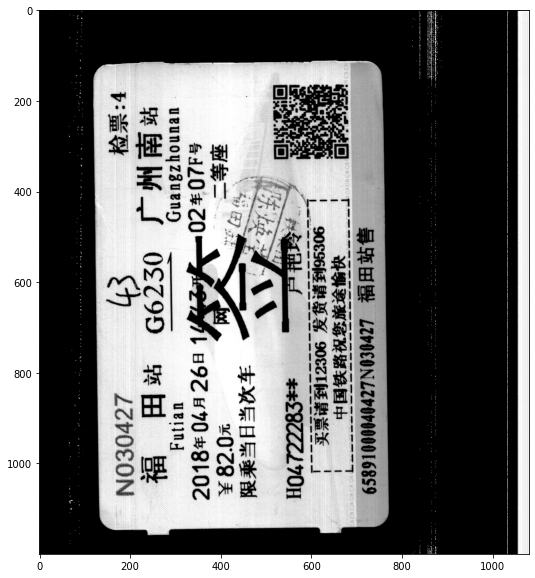

In [3]:
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap="gray")
plt.show()

In [4]:
res_img, thresh = cv2.threshold(img, 20, 255, cv2.THRESH_BINARY)

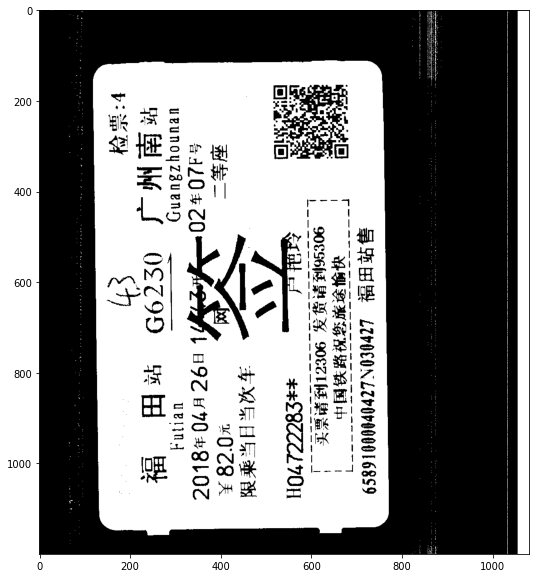

In [5]:
plt.figure(figsize=(10, 10))
plt.imshow(thresh, cmap="gray")
plt.show()

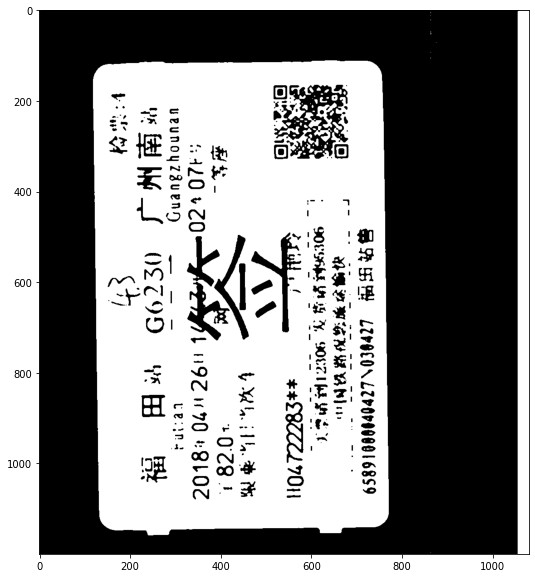

In [6]:
mid_img = cv2.medianBlur(thresh, 5)
plt.figure(figsize=(10, 10))
plt.imshow(mid_img, cmap="gray")
plt.show()

In [7]:
def morphology(img, mode, kernel_size):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    if mode == 'dilate':
        img = cv2.dilate(img,kernel)
    if mode == "erode":
        img = cv2.erode(img, kernel)
    if mode == "open":
        img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    if mode == "close":
        img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    return img

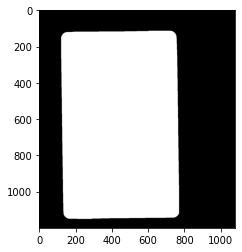

In [8]:
mor_img = morphology(mid_img, 'close', 20)
mor_img = morphology(mor_img, 'open', 80)
plt.imshow(mor_img, cmap='gray')
plt.show()

In [9]:
counters, hierarchy = cv2.findContours(mor_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [10]:
print(type(counters))
print(len(counters))
print(counters[0].shape)
print(counters[0].squeeze().shape)
print(type(counters[0]))

<class 'list'>
1
(180, 1, 2)
(180, 2)
<class 'numpy.ndarray'>


In [11]:
print(type(hierarchy))
print(hierarchy.shape)

<class 'numpy.ndarray'>
(1, 1, 4)


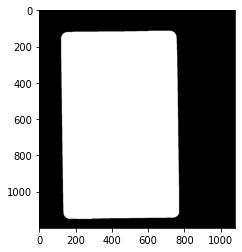

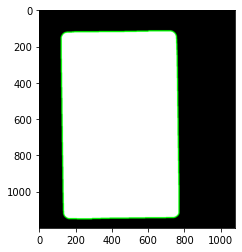

In [12]:
mid_img = cv2.cvtColor(mor_img, cv2.COLOR_GRAY2BGR)
plt.imshow(mid_img)
plt.show()
res_img = cv2.drawContours(mid_img, counters, 0, (0, 255, 0), 5)
plt.imshow(res_img)

In [13]:
rect = cv2.minAreaRect(counters[0].squeeze())
box = cv2.boxPoints(rect)

In [14]:
print(len(rect))
print(len(box))
print(rect[0], rect[1], rect[2])
print(box)

3
4
(446.6047058105469, 631.2418212890625) (1031.2166748046875, 639.7388916015625) 89.22578430175781
[[ 119.79746   120.002686]
 [ 759.47797   111.3584  ]
 [ 773.4119   1142.481   ]
 [ 133.73145  1151.1252  ]]


In [15]:
import numpy as np
mid_img = cv2.cvtColor(mor_img, cv2.COLOR_GRAY2BGR)
box = np.int0(box)
cv2.line(mid_img,(box[0][0], box[0][1]), (box[1][0], box[1][1]), (0, 0, 255), 5)
cv2.line(mid_img, box[1], box[2], (0, 0, 255), 5)
cv2.line(mid_img, box[2], box[3], (0, 0, 255), 5)
cv2.line(mid_img, box[3], box[0], (0, 0, 255), 5)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

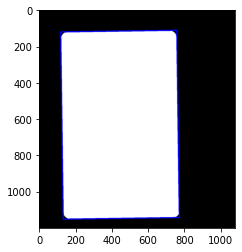

In [16]:
plt.imshow(mid_img)
plt.show()

In [17]:
rotateMat = cv2.getRotationMatrix2D(rect[0], -(180 - rect[2]),1)
rotateMat[0, 2]+=500
rotateMat[1, 2]+=100

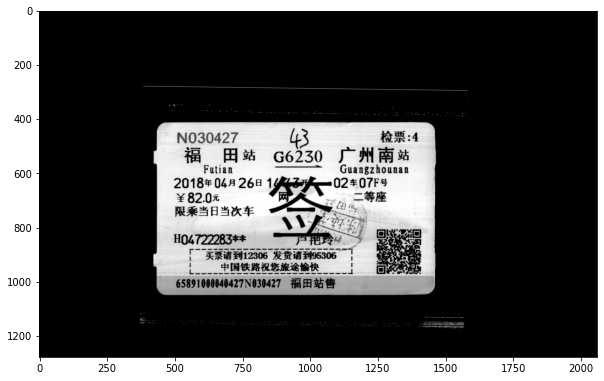

In [18]:
img_new = np.copy(img)
img_rotation = cv2.warpAffine(img_new, rotateMat,((2*int(rect[1][0]),  2*int(rect[1][1]))))
plt.figure(figsize=(10, 10))
plt.imshow(img_rotation, cmap='gray')
plt.show()

In [19]:
pt1, pt2, pt3, pt4 = box
[[pt1[0]], [pt1[1]]] = np.dot(rotateMat, [[pt1[0]], [pt1[1]], [1]])
[[pt2[0]], [pt2[1]]] = np.dot(rotateMat, [[pt2[0]], [pt2[1]], [1]])
[[pt3[0]], [pt3[1]]] = np.dot(rotateMat, [[pt3[0]], [pt3[1]], [1]])
[[pt4[0]], [pt4[1]]] = np.dot(rotateMat, [[pt4[0]], [pt4[1]], [1]])
print(pt1, pt2, pt3, pt4)

[1462  410] [1462 1050] [ 431 1050] [431 410]


In [20]:
left_img = img_rotation[ pt1[1]:pt2[1], pt3[0]:pt2[0]]

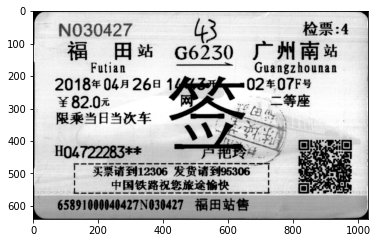

In [21]:
plt.imshow(left_img, cmap='gray')
plt.show()

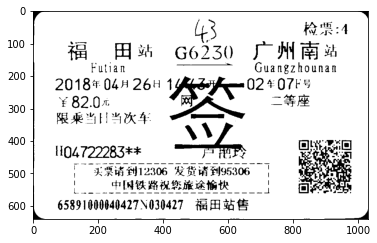

In [22]:
_, binarized_img = cv2.threshold(left_img, 20, 255, cv2.THRESH_BINARY)
plt.imshow(binarized_img, cmap='gray')
plt.show()

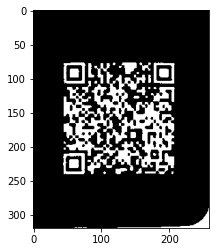

In [23]:
row, col = binarized_img.shape
left_right_0 = binarized_img[int(0.5*row): row, int(0.75* col):col]
plt.imshow(cv2.bitwise_not(left_right_0), cmap="gray")
plt.show()

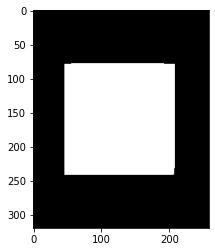

In [24]:
bitnot_img = cv2.bitwise_not(left_right_0)
morph_img = morphology(bitnot_img, 'close', 45)
morph_img = morphology(morph_img, 'open', 60)
plt.imshow(morph_img, cmap='gray')
plt.show()

In [25]:
counters, hierarchy = cv2.findContours(morph_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [26]:
print(counters[0].shape)
print(len(counters))

(11, 1, 2)
1


In [27]:
rect = cv2.minAreaRect(counters[0].squeeze())
box = cv2.boxPoints(rect)

((126.49998474121094, 159.49996948242188), (160.99996948242188, 162.99996948242188), -0.0)
[[ 46.       240.99995 ]
 [ 46.        77.999985]
 [206.99997   77.999985]
 [206.99997  240.99995 ]]


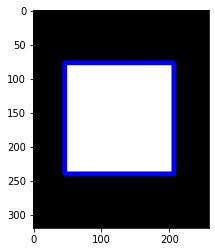

In [28]:
print(rect)
print(box)
mid_img = cv2.cvtColor(morph_img, cv2.COLOR_GRAY2BGR)
box = np.int0(box)
cv2.line(mid_img,(box[0][0], box[0][1]), (box[1][0], box[1][1]), (0, 0, 255), 5)
cv2.line(mid_img, box[1], box[2], (0, 0, 255), 5)
cv2.line(mid_img, box[2], box[3], (0, 0, 255), 5)
cv2.line(mid_img, box[3], box[0], (0, 0, 255), 5)
plt.imshow(mid_img)

In [29]:
row_p, col_p = left_right_0.shape
row, col = binarized_img.shape

In [30]:
print(row_p, col_p)
print(row, col)

320 258
640 1031


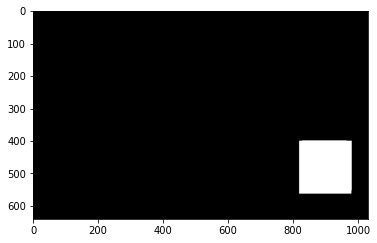

In [31]:
img_res = np.zeros_like(binarized_img)
img_res[row-row_p:row, col-col_p:col] = morph_img
plt.imshow(img_res,cmap='gray')
plt.show()

In [32]:
counters, hierarchy = cv2.findContours(img_res, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rect = cv2.minAreaRect(counters[0].squeeze())
box = cv2.boxPoints(rect)

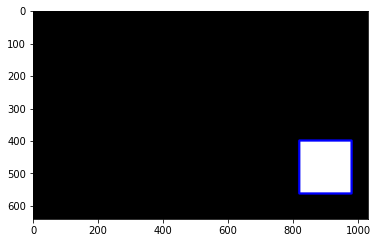

In [33]:
mid_img = cv2.cvtColor(img_res, cv2.COLOR_GRAY2BGR)
box = np.int0(box)
code_box = box
cv2.line(mid_img,(box[0][0], box[0][1]), (box[1][0], box[1][1]), (0, 0, 255), 5)
cv2.line(mid_img, box[1], box[2], (0, 0, 255), 5)
cv2.line(mid_img, box[2], box[3], (0, 0, 255), 5)
cv2.line(mid_img, box[3], box[0], (0, 0, 255), 5)
plt.imshow(mid_img)
plt.show()

In [34]:
print(box)

[[819 561]
 [819 398]
 [980 398]
 [980 561]]


In [35]:
row_bitcode_upper = box[1][1]
row_bitcode_lower = box[0][1]
col_bitcode_left = box[0][0]
col_bitcode_right = box[2][0]
row_bitcode_distance = row_bitcode_lower-row_bitcode_upper
print(row_bitcode_distance)

163


In [36]:
row_num21_upper = row_bitcode_lower + int(0.3/4.5*row_bitcode_distance)
row_num21_lower = row_bitcode_lower + int(1.6/4.5*row_bitcode_distance)
col_num21_right = col_bitcode_left - int(9.3/4.5*row_bitcode_distance)
col_num21_left = col_bitcode_left - int(20.7/4.5*row_bitcode_distance)

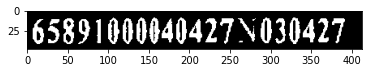

In [37]:
row_sub = row_num21_lower - row_num21_upper
col_sub = col_num21_right - col_num21_left
num_21_rect = binarized_img[row_num21_upper:row_num21_lower, col_num21_left:col_num21_right]
num_21_rect = cv2.bitwise_not(num_21_rect)
plt.imshow(num_21_rect, cmap='gray')
plt.show()

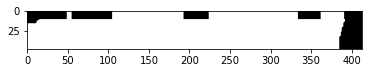

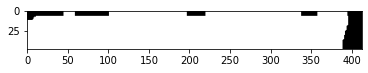

In [38]:
mor_img = morphology(num_21_rect, 'close', 21)
plt.imshow(mor_img, cmap='gray')
plt.show()
mor_img = morphology(mor_img, 'dilate', 9)
plt.imshow(mor_img, cmap='gray')
plt.show()

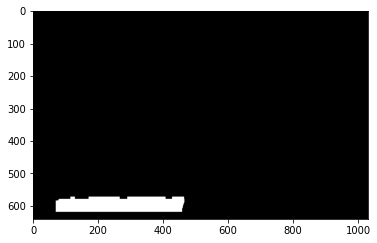

In [39]:
img_res = np.zeros_like(binarized_img)
img_res[row_num21_upper: row_num21_lower, col_num21_left:col_num21_right] = mor_img
plt.imshow(img_res, cmap='gray')
plt.show()

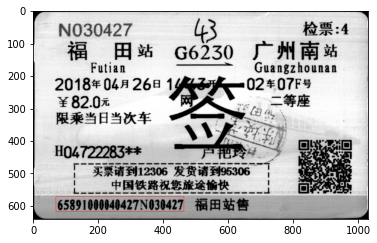

In [40]:
counters, hierarchy = cv2.findContours(img_res, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rect = cv2.minAreaRect(counters[0].squeeze())
box = cv2.boxPoints(rect)
mid_img = cv2.cvtColor(left_img, cv2.COLOR_GRAY2BGR)
box = np.int0(box)
cv2.line(mid_img,(box[0][0], box[0][1]), (box[1][0], box[1][1]), (255, 0, 0), 1)
cv2.line(mid_img, box[1], box[2],  (255, 0, 0), 1)
cv2.line(mid_img, box[2], box[3],  (255, 0, 0), 1)
cv2.line(mid_img, box[3], box[0],  (255, 0, 0), 1)
plt.imshow(mid_img)
plt.show()

In [41]:
box_new = box
print(box_new)
row_upper = box_new[1][1]
row_lower = box_new[0][1]
col_left = box_new[0][0]
col_right = box_new[2][0]
print(row_upper, row_lower, col_left, col_right)

[[ 70 616]
 [ 70 570]
 [464 570]
 [464 616]]
570 616 70 464


In [42]:
col_distance = col_right - col_left
x1 = box_new[1][0]
y1 = box_new[1][1]
x2 = box_new[0][0]
y2 = box_new[0][1]

In [43]:
ratio = 1.8
unit_scale = col_distance/(20+ratio)
gradient = 0

In [44]:
for i in range(1, 21):
    if i < 15:
                x3 = round(x1 + i * unit_scale)
                x4 = round(x2 + i * unit_scale)
    if i >= 15:
        x3 = round(x1 + (i + ratio-1) * unit_scale)
        x4 = round(x2 + (i + ratio-1) * unit_scale)
    y3 = round(y1 + (x3 - x1) * gradient)
    y4 = round(y2 + (x4 - x2) * gradient)
    x3 = int(x3)
    x4 = int(x4)
    y3 = int(y3)
    y4 = int(y4)
    cv2.line(mid_img, (x3, y3), (x4, y4), (255, 0, 0), 1)

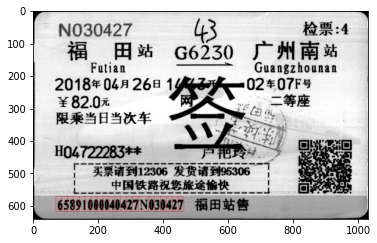

In [45]:
plt.imshow(mid_img)
plt.show()

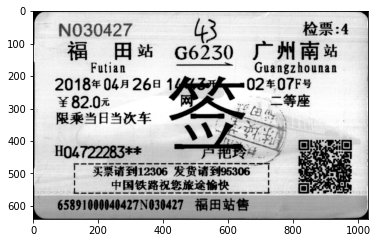

[[819 561]
 [819 398]
 [980 398]
 [980 561]]


In [46]:
plt.imshow(left_img, cmap='gray')
plt.show()
print(code_box)

In [47]:
binarized_img = (left_img > 60) & (left_img < 120)
binarized_img = binarized_img*255

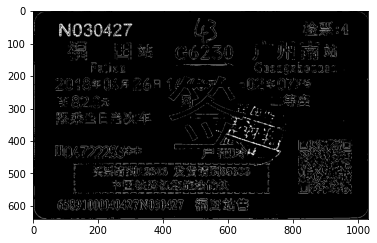

In [48]:
plt.imshow(binarized_img, cmap='gray')
plt.show()

In [49]:
row_bitcode_upper = min(b[1] for b in code_box)
row_bitcode_lower = max(b[1] for b in code_box)
col_bitcode_left = min(b[0] for b in code_box)
col_bitcode_right = max(b[0] for b in code_box)
row_bitcode_distance = row_bitcode_lower - row_bitcode_upper
row_num7_upper = row_bitcode_upper - int(10.7 / 4.5 * row_bitcode_distance)
row_num7_lower = row_bitcode_upper - int(7.3 / 4.5 * row_bitcode_distance)
col_num7_right = col_bitcode_left - int(13 / 4.5 * row_bitcode_distance)
col_num7_left = col_bitcode_left - int(22.2 / 4.5 * row_bitcode_distance)
# if row_num7_upper < 0:
#     row_num7_upper = 0
# if col_num7_left < 0:
#     col_num7_left = 0
print(row_num7_upper, row_num7_lower, col_num7_left, col_num7_right)

11 134 15 349


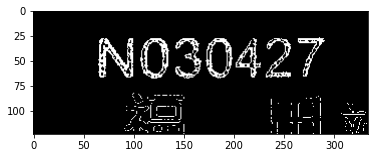

In [50]:
num_7_img = binarized_img[row_num7_upper: row_num7_lower, col_num7_left:col_num7_right]
plt.imshow(num_7_img, cmap='gray')
plt.show()
num_7_img = num_7_img.astype('uint8')

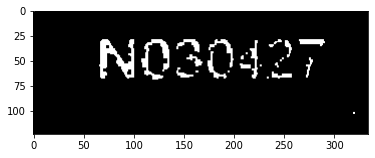

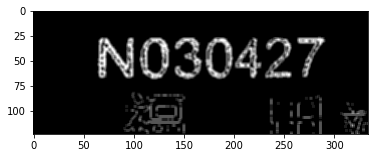

In [51]:
mor_img = morphology(num_7_img, 'open', 2)
mor_img = morphology(mor_img, 'close', 3)
plt.imshow(mor_img, cmap='gray')
plt.show()
blur_img = cv2.blur(num_7_img, (3, 3))
plt.imshow(blur_img, cmap='gray')
plt.show()

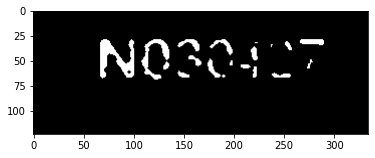

In [52]:
num_7_rect = cv2.medianBlur(mor_img, 5)
plt.imshow(num_7_rect, cmap='gray')
plt.show()

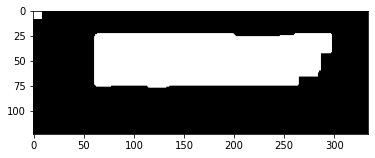

In [53]:
num_7_rect = morphology(num_7_rect, 'close', 40)
num_7_rect = morphology(num_7_rect, 'dilate', 15)
plt.imshow(num_7_rect, cmap='gray')
plt.show()

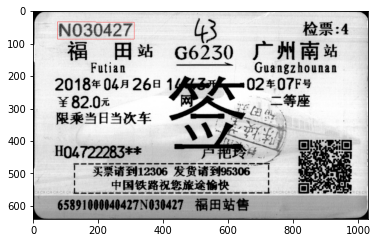

In [54]:
help_image = np.zeros_like(binarized_img)
help_image[row_num7_upper:row_num7_lower, col_num7_left:col_num7_right] = num_7_rect
help_image = help_image.astype('uint8')
counters, hierarchy = cv2.findContours(help_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rect = cv2.minAreaRect(counters[0].squeeze())
box = cv2.boxPoints(rect)
mid_img = cv2.cvtColor(left_img, cv2.COLOR_GRAY2BGR)
box = np.int0(box)
cv2.line(mid_img,(box[0][0], box[0][1]), (box[1][0], box[1][1]), (255, 0, 0), 1)
cv2.line(mid_img, box[1], box[2],  (255, 0, 0), 1)
cv2.line(mid_img, box[2], box[3],  (255, 0, 0), 1)
cv2.line(mid_img, box[3], box[0],  (255, 0, 0), 1)
plt.imshow(mid_img)
plt.show()